In [1]:
from main import *
from xml_parser import *

In [2]:
sigma = 0.5
k = 500
min = 50

In [3]:
input_path = "data/VOC2012_test/JPEGImages/2008_000200.jpg"

Height:  375
Width:   500
Execution time: 0 minute(s) and 13 seconds


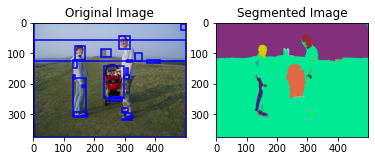

In [4]:
univ, bb = segment(input_path, sigma, k, min)

In [5]:
df_bndbox = parse_XML("data/VOC2012_test/Annotations/2008_000200.xml")

In [7]:
df_bndbox

,name,xmin,ymin,xmax,ymax
0,person,119,76,184,311
1,person,266,43,338,323


In [11]:
def aux(a,b,c,d):
    "lower left , upper right corners"
    "a,b : first rec"
    "c,d : second rec"
    x, y = 0, 1
    
    w = min(b[x],d[x]) - max(a[x],c[x])
    h = min(b[y],d[y]) - max(a[y],c[y])
    
    if min(w,h) > 0 :
        return w*h
    else:
        return 0
    
def area_inter(a,b,c,d):
    x, y = 0, 1
    
    area1 = (b[x]-a[x]) * (b[y]-a[y])
    area2 = (d[x]-c[x]) * (d[y]-c[y])
    
    intersect = aux(a,b,c,d)
    
    return area1 + area2 - intersect

In [15]:
def overlappingArea(l1, r1, l2, r2):
    x = 0
    y = 1
    
    area1 = abs(l1[x] - r1[x]) * abs(l1[y] - r1[y])
    area2 = abs(l2[x] - r2[x]) * abs(l2[y] - r2[y])
    
    x_dist = min(r1[x], r2[x]) - max(l1[x], l2[x])
    
    y_dist = min(r1[y], r2[y]) - max(l1[y], l2[y])
    
    areaI = 0
    
    if x_dist > 0 and y_dist > 0:
        areaI = x_dist * y_dist
        
    return (area1 + area2 - areaI)

In [17]:
overlappingArea((1,2),(4,6),(3,4),(5,8))

TypeError: 'int' object is not callable